In [13]:
#import libraries
from sklearn.datasets import load_boston # dataset
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import statsmodels as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns

%matplotlib inline

In [14]:
df = pd.read_csv("tips.csv")
df
print(list(df.columns.values))

['obs', 'totbill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


In [16]:
df1 = pd.get_dummies(df['sex'])
#df1
df2 = pd.get_dummies(df['smoker'])
#df2
df4 = pd.concat([df1,df2], axis =1)
#df4
df3 = pd.get_dummies(df['time'])
#df3
df5 = pd.concat([df3,df4], axis =1)
#df5
df6 = pd.concat([df,df5], axis =1)
df6

,obs,totbill,tip,sex,smoker,day,time,size,Day,Night,F,M,No,Yes
0,1,16.99,1.01,F,No,Sun,Night,2,0,1,1,0,1,0
1,2,10.34,1.66,M,No,Sun,Night,3,0,1,0,1,1,0
2,3,21.01,3.50,M,No,Sun,Night,3,0,1,0,1,1,0
3,4,23.68,3.31,M,No,Sun,Night,2,0,1,0,1,1,0
4,5,24.59,3.61,F,No,Sun,Night,4,0,1,1,0,1,0
5,6,25.29,4.71,M,No,Sun,Night,4,0,1,0,1,1,0
6,7,8.77,2.00,M,No,Sun,Night,2,0,1,0,1,1,0
7,8,26.88,3.12,M,No,Sun,Night,4,0,1,0,1,1,0
8,9,15.04,1.96,M,No,Sun,Night,2,0,1,0,1,1,0
9,10,14.78,3.23,M,No,Sun,Night,2,0,1,0,1,1,0


In [17]:
df7 = df6.drop(["sex","smoker","time","day","obs"],axis =1)
df7
#make and female is rep by 0 and 1 
#day and night is also represented by 1 and 0, along with smoker.

,totbill,tip,size,Day,Night,F,M,No,Yes
0,16.99,1.01,2,0,1,1,0,1,0
1,10.34,1.66,3,0,1,0,1,1,0
2,21.01,3.50,3,0,1,0,1,1,0
3,23.68,3.31,2,0,1,0,1,1,0
4,24.59,3.61,4,0,1,1,0,1,0
5,25.29,4.71,4,0,1,0,1,1,0
6,8.77,2.00,2,0,1,0,1,1,0
7,26.88,3.12,4,0,1,0,1,1,0
8,15.04,1.96,2,0,1,0,1,1,0
9,14.78,3.23,2,0,1,0,1,1,0


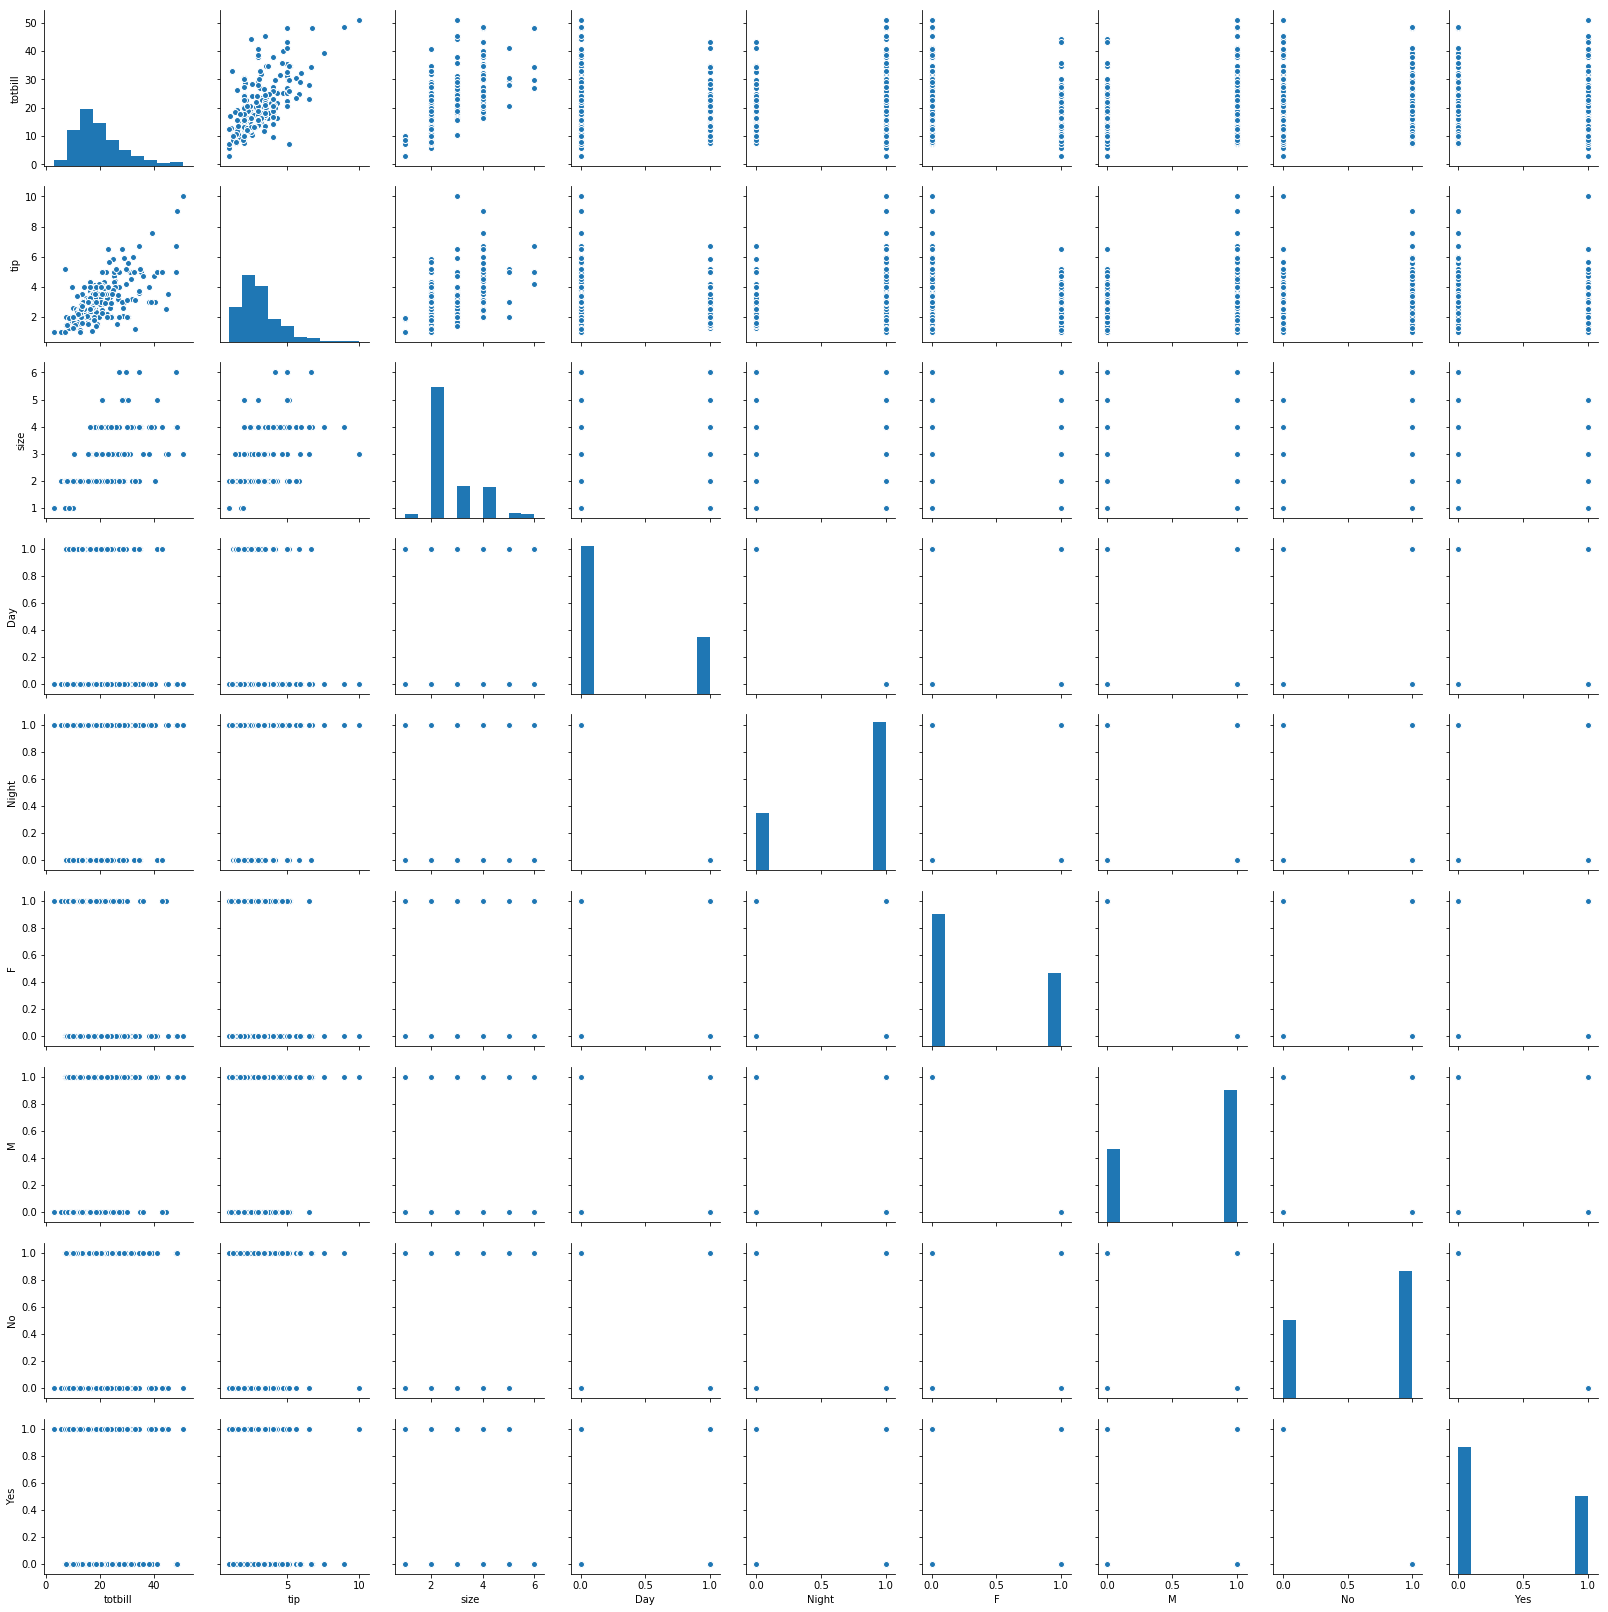

In [18]:
sns.pairplot(df7)

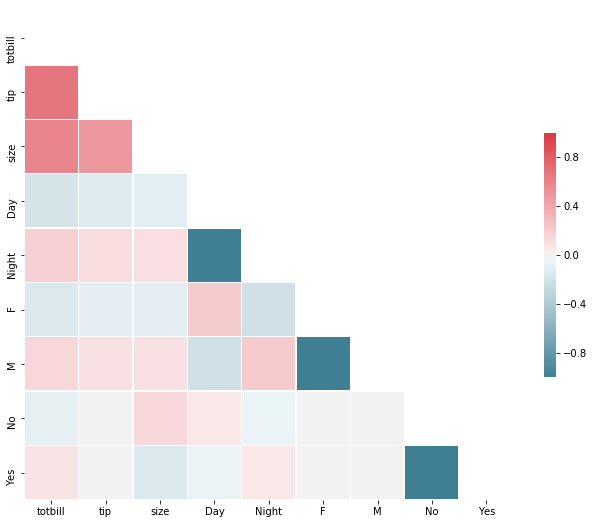

In [19]:
corr = (df7.corr(method='pearson'))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.4, cbar_kws={"shrink": .5})


In [34]:
for i in range(8):
     first = df7.drop(df7.columns[i], axis=1)
    #if i = 2 
    #break

first = df7.drop(['tip','size','Day','Night','F','M','No','Yes'], axis=1)
second = df7.drop(['totbill','size','F','M','No','Yes','Day','Night'], axis=1)

In [35]:
#second = df7.drop(['totbill','size','day','night','F','M','No','Yes'], axis=1)
second

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
5,4.71
6,2.00
7,3.12
8,1.96
9,3.23


In [36]:
lm=linear_model.LinearRegression()
lm.fit(first,second)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.10502452]]


In [38]:
import statsmodels.api as sm
model = sm.OLS(first, second)
res = model.fit()
print("Enters")

Enters


In [39]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                totbill   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     2004.
Date:                Sat, 02 Jun 2018   Prob (F-statistic):          2.26e-119
Time:                        23:45:07   Log-Likelihood:                -825.57
No. Observations:                 244   AIC:                             1653.
Df Residuals:                     243   BIC:                             1657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tip            6.2052      0.139     44.771      0.000       5.932       6.478
==============================================================================
Omnibus:                       33.937   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.569
Skew:                           0.688   Prob(JB):                     2.88e-16
Kurtosis:                       5.269   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [41]:
rmse_training = sqrt(mean_squared_error(first, second))
print("RMSE for training data:", rmse_training)
print("nlah")
#Totbill

RMSE for training data: 18.603269135853076
nlah


In [45]:
first = df7.drop(['tip','totbill','Day','Night','F','M','No','Yes'], axis=1)
second = df7.drop(['totbill','F','M','No','Yes','Day','Night','size'], axis=1)

In [46]:
second

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
5,4.71
6,2.00
7,3.12
8,1.96
9,3.23


In [47]:
lm=linear_model.LinearRegression()
lm.fit(first,second)
print('Coefficients: \n', lm.coef_)
import statsmodels.api as sm
model = sm.OLS(first, second)
res = model.fit()
print("Enters")

Coefficients: 
 [[0.71182064]]
Enters


In [48]:
import seaborn as sns
import numpy as np
%matplotlib inline
rmse_training = sqrt(mean_squared_error(first, second))
print("RMSE for training data:", rmse_training)
print("nlah")
#Size

RMSE for training data: 1.3071574716680867
nlah


In [50]:
first = df7.drop(['tip','totbill','Night','F','M','No','Yes','size'], axis=1)
second = df7.drop(['totbill','F','M','No','Yes','Day','Night','size'], axis=1)
second

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
5,4.71
6,2.00
7,3.12
8,1.96
9,3.23


In [51]:
lm=linear_model.LinearRegression()
lm.fit(first,second)
print('Coefficients: \n', lm.coef_)
import statsmodels.api as sm
model = sm.OLS(first, second)
res = model.fit()
print("Enters")

Coefficients: 
 [[-0.37458222]]
Enters


In [53]:
import seaborn as sns
import numpy as np
%matplotlib inline
rmse_training = sqrt(mean_squared_error(first, second))
print("RMSE for training data:", rmse_training)
print("nlah")
#Day

RMSE for training data: 3.1071527739484806
nlah


In [54]:
first = df7.drop(['tip','totbill','F','M','No','Yes','size','Day'], axis=1)
second = df7.drop(['totbill','F','M','No','Yes','Day','Night','size'], axis=1)
first

,Night
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [55]:
lm=linear_model.LinearRegression()
lm.fit(first,second)
print('Coefficients: \n', lm.coef_)
import statsmodels.api as sm
model = sm.OLS(first, second)
res = model.fit()
print("Enters")

Coefficients: 
 [[0.37458222]]
Enters


In [56]:
import seaborn as sns
import numpy as np
%matplotlib inline
rmse_training = sqrt(mean_squared_error(first, second))
print("RMSE for training data:", rmse_training)
print("nlah")
#Night

RMSE for training data: 2.672379365922779
nlah


In [ ]:
first = df7.drop(['tip','totbill','M','No','Yes','size','Day','Night'], axis=1)
second = df7.drop(['totbill','F','M','No','Yes','Day','Night','size'], axis=1)
first

In [58]:
lm=linear_model.LinearRegression()
lm.fit(first,second)
print('Coefficients: \n', lm.coef_)
import statsmodels.api as sm
model = sm.OLS(first, second)
res = model.fit()
print("Enters")

Coefficients: 
 [[-0.25616956]]
Enters


In [59]:
import seaborn as sns
import numpy as np
%matplotlib inline
rmse_training = sqrt(mean_squared_error(first, second))
print("RMSE for training data:", rmse_training)
print("nlah")
#Female

RMSE for training data: 3.038464614425311
nlah


In [ ]:
first = df7.drop(['tip','totbill','M','F','Yes','size','Day','Night'], axis=1)
second = df7.drop(['totbill','F','M','No','Yes','Day','Night','size'], axis=1)
first

In [ ]:
second
#base